<a href="https://colab.research.google.com/github/ChickenRob0t/Homework-classes/blob/Dynamic-Systems-and-Chaos/Oscilador_arm%C3%B3nico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
''' 
q --> [cm]
p --> [kg*cm/s]
w --> [1/s]
m --> [kg]
t --> [s]

Se quiere resolver
dq/dt = p/m
dp/dt = -mqw**2
'''

' \nq --> [cm]\np --> [kg*cm/s]\nw --> [1/s]\nm --> [kg]\nt --> [s]\n\nSe quiere resolver\ndq/dt = p/m\ndp/dt = -mqw**2\n'

In [ ]:
#Asignación de valores iniciales y constantes
q0=5
p0=50
w=4
m=5

t=10
dt=0.01
step=round(t/dt)

q=np.zeros(step+1) #Aquí guardaré los valores 
p=np.zeros(step+1) #que vaya teniendo de q y p

In [ ]:
q[0]=q0
p[0]=p0
for i in range(step):
  q[i+1]=q[i]+dt*p[i]/m
  p[i+1]=p[i]-dt*q[i]*w**2*m
  

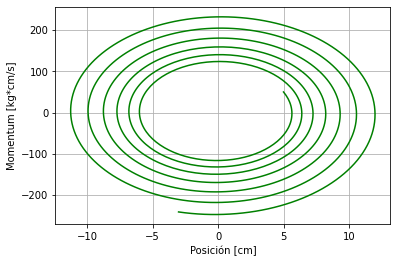

In [ ]:
#Ploteo de la posición vs momentum
plt.plot(q,p,color='g') 
plt.xlabel('Posición [cm]' )
plt.ylabel('Momentum [kg*cm/s]')
plt.grid('on')

## **Implementación vectorial**

In [ ]:
M=np.array([[0,1/m], [-w**2 * m,0]]) #Matriz
x=np.array([q0,p0]) #El array que usaremos para hacer la operación de x, con las C.I
X=np.zeros((2,step+1)) #Matriz para guardar los valores que dé la operación x
X[:,0]=x  #Condiciones iniciales p0,q0
for i in range(step):
  x=x+dt*np.matmul(M,x)
  X[:,i+1]=x


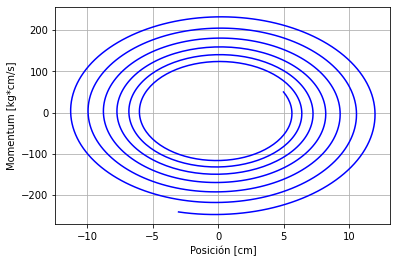

In [ ]:
#Ploteo del espacio de fases
plt.plot(X[0,:],X[1,:],color='b')

plt.xlabel('Posición [cm]' )
plt.ylabel('Momentum [kg*cm/s]')
plt.grid('on')

## **Trayectoria real del espacio de fases**

In [ ]:
#Ahora calculamos el valor de la energía total con el Hamiltoniano con las C.I
En=p0**2/(2*m)+ m*w**2*q0**2/2

def H(q,p): return p**2/(2*m) + m*w**2*q**2/2 - En #La función que nos da la verdadera curva en el espacio de fases

ax_1= np.sqrt(2*En*m)   #Los valores de los semiejes de p y q
ax_2= np.sqrt(2*En/(m*w**2))

p_b=np.linspace(-ax_1,ax_1,300)  #El intérvalo de p y q partido en 300 puntos
q_b=np.linspace(-ax_2,ax_2,300)

x,y=np.meshgrid(q_b,p_b) #La unión de estos intérvalos y z los valores de la función en estos puntos 
z=H(x,y)



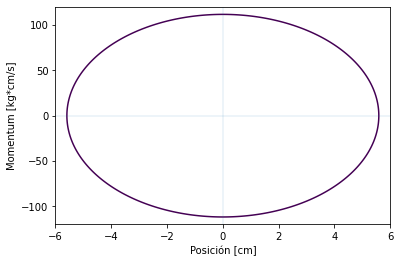

In [ ]:
#Ploteo del espacio de fases
fig, ax= plt.subplots()
ax.contour(x,y,z,[0])
ax.set(xlabel='Posición [cm]',ylabel='Momentum [kg*cm/s]')
ax.set_xlim(-6,6)
ax.set_ylim(-120,120)
plt.axhline(0,alpha=.1)
plt.axvline(0,alpha=.1)


plt.show()

## **Función dependiente de los pasos y que hace más pequeños los dt**
Esto no me sirvió mucho, porque al aumentar los pasos al igual que con el dt, pues parece que hay un intérvalo más grande.

In [ ]:

#Creamos una función para generar los puntos X
def Pos(steps):
  M=np.array([[0,1/m], [-w**2 * m,0]]) #Matriz
  x_0=np.array([q0,p0])
  X=np.zeros((2,steps+1)) 
  X[:,0]=x_0
  for j in range(steps):
    x_0=x_0+(10/steps)*np.matmul(M,x_0)
    X[:,j+1]=x_0
  return X

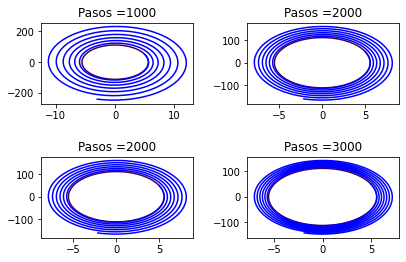

In [ ]:
fig, ax= plt.subplots(2,2)
for i in range(2):
  for j in range(2):
    steps=1000*(1+i+j)
    X_2=Pos(steps)
    ax[i,j].contour(x,y,z,[0])
    ax[i,j].plot(X_2[0,:],X_2[1,:],color='b')
    fig.tight_layout(pad=2.0)
    ax[i,j].set_title('Pasos =' + str(steps) )

## **Función que cambia el tamaño de los dt**

In [ ]:
def Pos(i):
  steps=10000
  M=np.array([[0,1/m], [-w**2 * m,0]]) #Matriz
  x_0=np.array([q0,p0])
  X=np.zeros((2,steps+1)) 
  X[:,0]=x_0
  for j in range(steps):
    dt=1/(100*(i+1))
    x_0=x_0+dt*np.matmul(M,x_0)
    X[:,j+1]=x_0
  return X

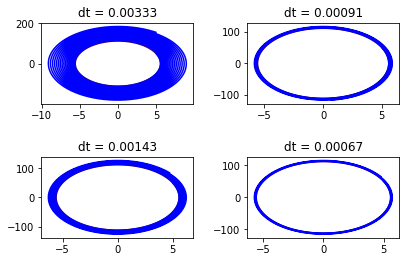

In [ ]:
#Ploteo de la función
fig, ax= plt.subplots(2,2)
for i in range(2):
  for j in range(2):
    
    X_2=Pos(i*4+j*8+3)
    dt=1/(100*(i*4+j*8+3))

    ax[i,j].contour(x,y,z,[0])
    ax[i,j].plot(X_2[0,:],X_2[1,:],color='b')
    fig.tight_layout(pad=2.0)
    ax[i,j].set_title('dt = '+str(round(dt,5)))
  plt.savefig('4beibe.png',dpi=200)

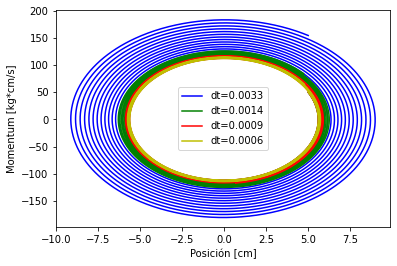

In [ ]:
X_1=Pos(3)
plt.plot(X_1[0,:],X_1[1,:],color='b',label='dt=0.0033')
X_2=Pos(7)
plt.plot(X_2[0,:],X_2[1,:],color='g',label='dt=0.0014')
X_3=Pos(11)
plt.plot(X_3[0,:],X_3[1,:],color='r',label='dt=0.0009')
X_4=Pos(15)
plt.plot(X_4[0,:],X_4[1,:],color='y',label='dt=0.0006')


plt.xlabel('Posición [cm]' )
plt.ylabel('Momentum [kg*cm/s]')
plt.legend()
plt.show()
#plt.savefig('Todas_J.png',dpi=200)